**Group 10**

Members :

- Natasha Kayla Cahyadi - 2702235891
- Jeremy Djohar Riyadi - 2702219572

Class : LC09 - Model Deployment

# Libraries

In [44]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
import pickle as pkl

# Data Preparation

In [45]:
# Read the Data
df = pd.read_csv('netflix_titles.csv')

In [46]:
# Display the Data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Show the number of rows and columns in the dataset
df.shape

(8807, 12)

In [48]:
# Show data columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [49]:
# Show info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [50]:
# Show statistics descriptive
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [51]:
# Show unique number
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

**show_id** has the most unique number because that column is an identifier and should have different number in each row.

# Data Preprocessing

In [52]:
df = df[df['type'] == 'Movie']

We were only using the column type **movie** because the task specifically asks us to display **the top 5 movies**.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6131 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6131 non-null   object
 1   type          6131 non-null   object
 2   title         6131 non-null   object
 3   director      5943 non-null   object
 4   cast          5656 non-null   object
 5   country       5691 non-null   object
 6   date_added    6131 non-null   object
 7   release_year  6131 non-null   int64 
 8   rating        6129 non-null   object
 9   duration      6128 non-null   object
 10  listed_in     6131 non-null   object
 11  description   6131 non-null   object
dtypes: int64(1), object(11)
memory usage: 622.7+ KB


## Drop Type Column

In [54]:
df.drop(columns=['type'], inplace=True)

The **type** column was dropped because all entries in the dataset were movies, so the column was no longer needed.

## Drop Identifier

In [55]:
# Drop index column
df.drop(columns=['show_id'], inplace=True)

The **show_id** column was also dropped because itb contained unique values and was not needed when building the recommender system.

In [56]:
df.head()

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


## Handle Duplicated Data

In [57]:
# Show duplicated data
df.duplicated().sum()

0

There was **no duplicated values** in this dataset.

## Handle Missing Values

In [58]:
df.isnull().sum()

title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [59]:
# Replace all missing values with 'Unknown'
df.fillna('Unknown', inplace=True)

We replaced all missing values with **Unknown**, based on the assumption that missing values indicate the information in that column for the given row in unknown.

## Check Anomalies

In [60]:
# Make an empty variable to store categorical and numerical columns
categorical_columns = []
numerical_columns = []

# Looping to divide categorical and numerical, then store it to an empty variable that we've made
for i in df.columns:
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        numerical_columns.append(i)
    else:
        categorical_columns.append(i)

# Display the categorical and numerical columns
print(f'Categorical: {categorical_columns}')
print(f'Numeric: {numerical_columns}')

Categorical: ['title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']
Numeric: ['release_year']


We divided the variables into **categorical** and **numerical** to simplify our data preprocessing.

In [61]:
# Count the categorical values in each columns
for i in categorical_columns:
    print(df[i].value_counts(),'\n')

title
Dick Johnson Is Dead            1
Balto                           1
Bangkok Traffic (Love) Story    1
Bangkok Hell                    1
Bang Rajan 2                    1
                               ..
Potato Potahto                  1
Luck by Chance                  1
Lakshya                         1
Karthik Calling Karthik         1
Zubaan                          1
Name: count, Length: 6131, dtype: int64 

director
Unknown                       188
Rajiv Chilaka                  19
Raúl Campos, Jan Suter         18
Suhas Kadav                    16
Marcus Raboy                   15
                             ... 
Sion Sono                       1
Dennis Rovira van Boekholt      1
Naoto Amazutsumi                1
Jenny Gage                      1
Mozez Singh                     1
Name: count, Length: 4355, dtype: int64 

cast
Unknown                                                                                                                                             

## Handle the Anomalies

In [62]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

The **date_edit** column was converted into the **datetime** datatype so that it could be used for time-based analysis.

In [63]:
df['date_added'].value_counts()

date_added
2020-01-01    97
2019-11-01    75
2018-03-01    72
2019-12-31    67
2018-10-01    64
              ..
2017-10-28     1
2017-10-27     1
2017-10-26     1
2017-10-24     1
2020-01-11     1
Name: count, Length: 1533, dtype: int64

In [64]:
df.loc[df['rating'].isin(['UR', 'Unknown']), 'rating'] = 'NR'

The values **"NR"** and **"Unknown"** in the **rating** column were replaced with **"NR"** to standardize unrated entries.

In [65]:
df = df[~df['rating'].isin(['74 min', '66 min', '84 min'])]

The values **74 min, 66 min,** and **84 min** were removed from the rating column because they actually represent durations, not age rating categories.

In [66]:
df['rating'].value_counts()

rating
TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            80
G             41
TV-Y7-FV       5
NC-17          3
Name: count, dtype: int64

# Exploratory Data Analysis

## Check Distribution

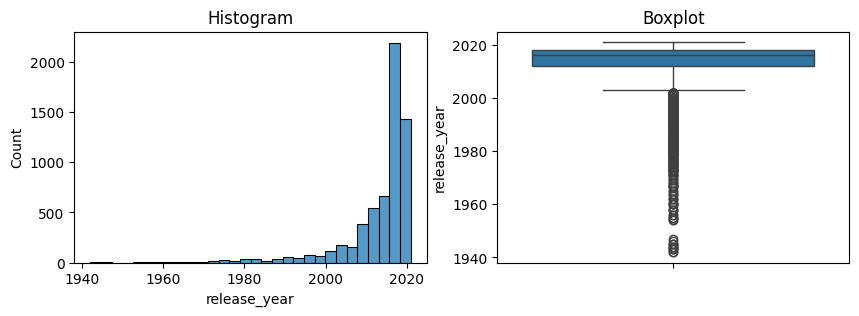

Skewness: -3.04528337500974
Kurtosis: 12.027319321164654


In [67]:
# Make a plot to check distribution
def check_distribution_outliers(df, columns):
    for i in columns:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[i], bins=30)
        plt.title('Histogram')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[i])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[i].skew())
        print('Kurtosis:', df[i].kurt())

check_distribution_outliers(df[numerical_columns], numerical_columns)

The **release_year** column contains many outliers, and its histogram is right-skewed. However, we did not remove the outliers because the data is valid and reasonable--this distribution indicates that a large number of movies were released after the year 2000.

## Movies Released Over Time

C:\Users\Jeremy Djohar Riyadi\AppData\Local\Temp\ipykernel_11544\939015317.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='release_year', palette='coolwarm', order=sorted(df['release_year'].unique()))


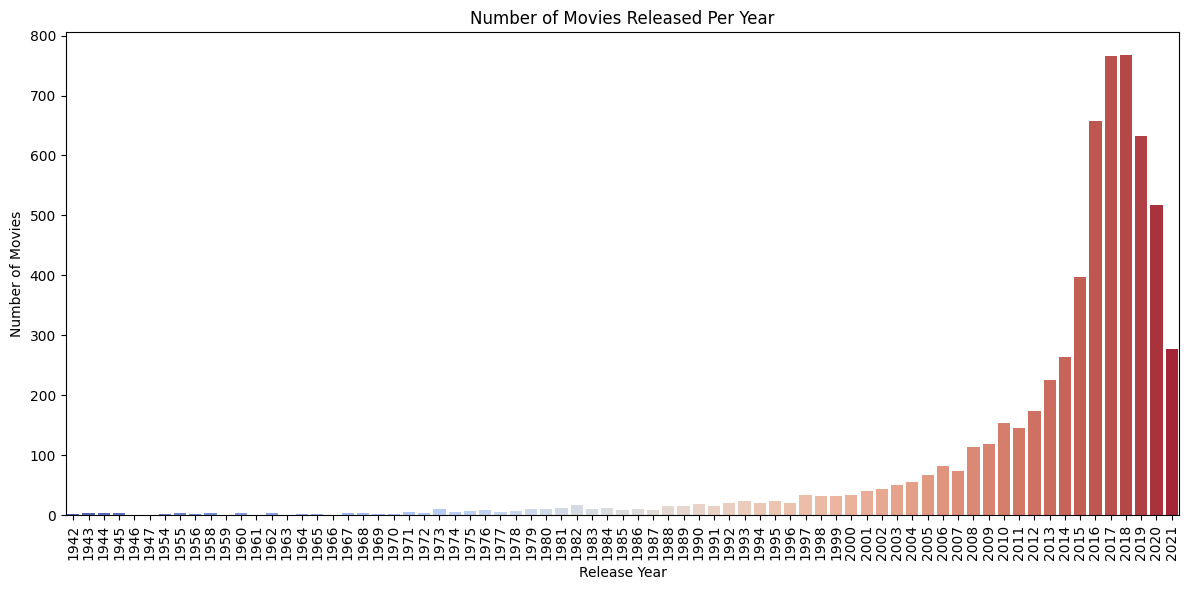

In [68]:
# Movies per release year
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='release_year', palette='coolwarm', order=sorted(df['release_year'].unique()))
plt.title('Number of Movies Released Per Year')
plt.xticks(rotation=90)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

**Movies released after 2000** are the most common in the dataset, with a sharp increase in frequency, especially between **2016 and 2020**. Earlier decades, like the **1940s to 1990s**, have significantly fewer releases. This indicates that the movie industry has grown rapidly in recent years, with modern digital platforms contributing to the surge, while older movies make up a smaller portion of the dataset.

## Top 10 Countries by Number of Movies

C:\Users\Jeremy Djohar Riyadi\AppData\Local\Temp\ipykernel_11544\74356114.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


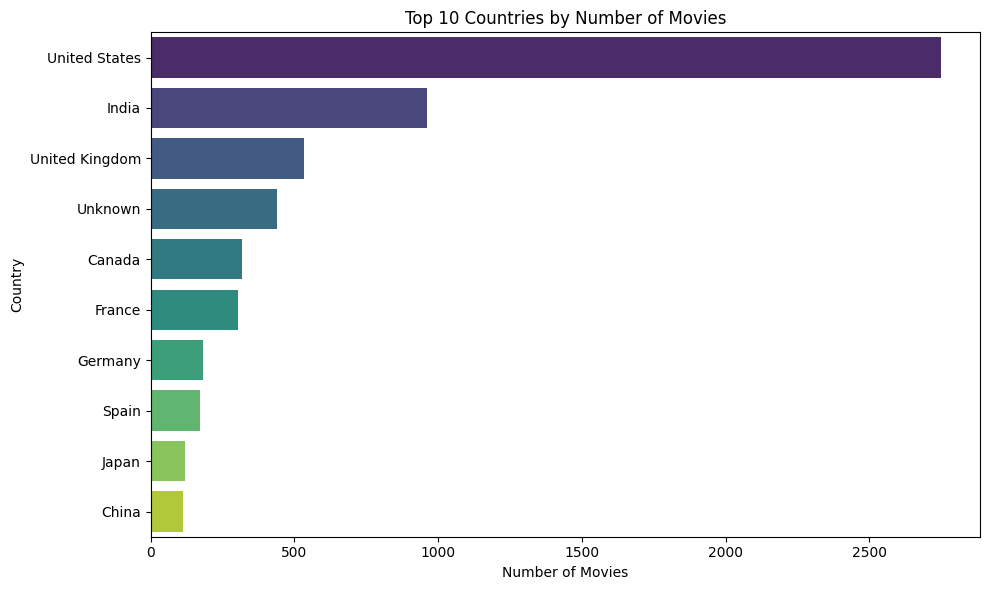

In [69]:
# Top countries
top_countries = df['country'].dropna().str.split(', ', expand=True).stack().value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title('Top 10 Countries by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

The **United States** dominates movie production in the dataset, followed by **India** and the **United Kingdom**. Countries like **Canada, France,** and **Germany** contribute moderately, while **Japan, China,** and **Spain** have fewer entries. The **Unknown** category reflects some missing data.

## Most Common Movie Genres

C:\Users\Jeremy Djohar Riyadi\AppData\Local\Temp\ipykernel_11544\907918673.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="magma")


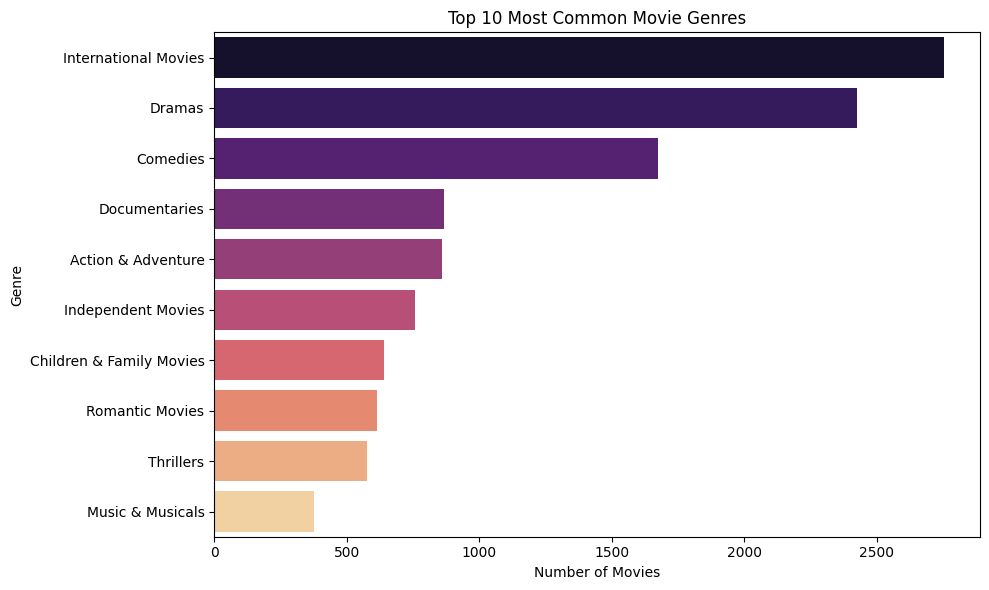

In [70]:
# Top genres
top_genres = df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="magma")
plt.title('Top 10 Most Common Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

**International Movies** is the most common genre, with the highest number of movies, followed by **Dramas and Comedies**. Genres like **Documentaries and Action & Adventure** are moderately represented, while genres such as **Thrillers and Music & Musicals** have the lowest frequency. This indicates that international and dramatic storytelling dominates the movie landscape, whereas musical and suspense-driven content caters to a more niche audience.

## Distribution of Movie Durations

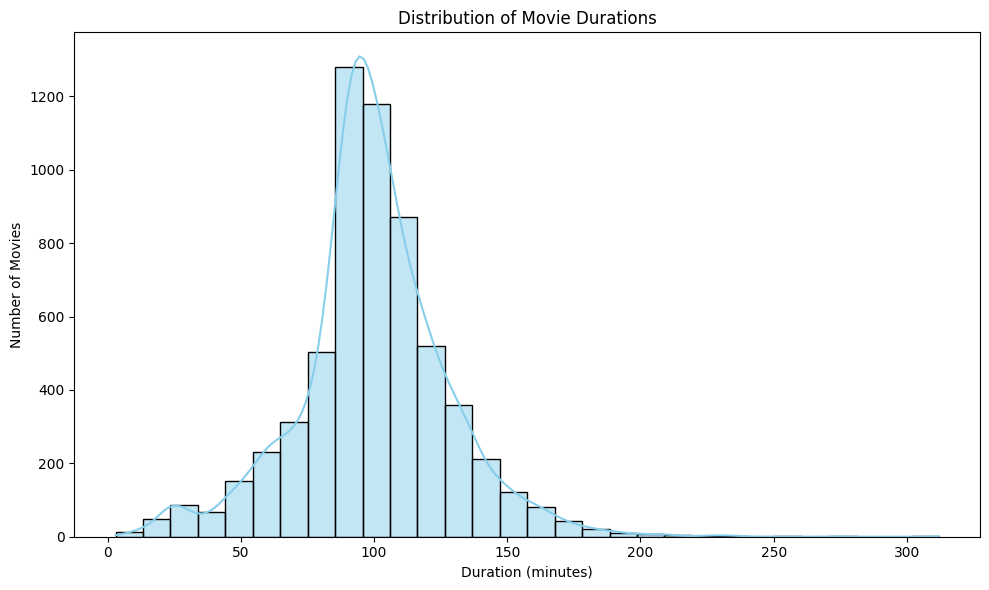

In [71]:
# Extract duration in minutes
data = df.copy()
data['duration_minutes'] = data['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,6))
sns.histplot(data['duration_minutes'].dropna(), bins=30, kde=True, color="skyblue")
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

Most movies have durations between **80 and 120 minutes**, peaking around **90 minutes**, showing that standard feature-length films are the most common. Short (<60 mins) and long (>150 mins) movies are rare, indicating a preference for conventional movie lengths. This distribution is slightly **right-skewed**, with fewer long-duration films.

## Top 10 Movie Directors

C:\Users\Jeremy Djohar Riyadi\AppData\Local\Temp\ipykernel_11544\2930085076.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="cubehelix")


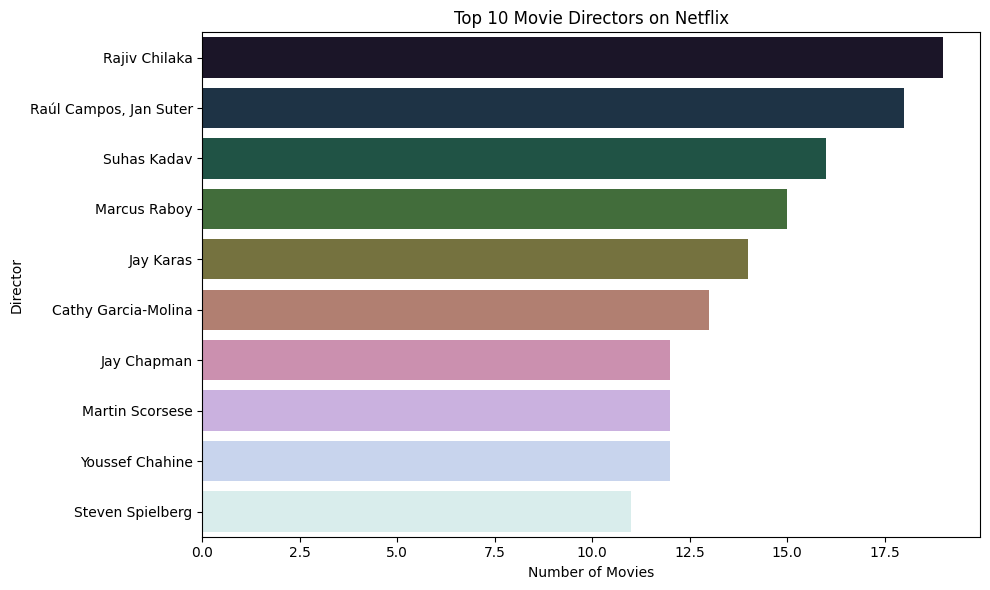

In [72]:
df = df[df['director'] != 'Unknown']
top_directors = df['director'].dropna().value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="cubehelix")
plt.title('Top 10 Movie Directors on Netflix')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

**Rajiv Chilaka** has the most movies on Netflix, followed by **Raúl Campos & Jan Suter and Suhas Kadav**. Famous directors like **Martin Scorsese and Steven Spielberg** are also in the top 10, but with fewer movies. This shows that Netflix includes both highly productive and well-known directors.

## Distribution of Movie Ratings

C:\Users\Jeremy Djohar Riyadi\AppData\Local\Temp\ipykernel_11544\517116032.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")


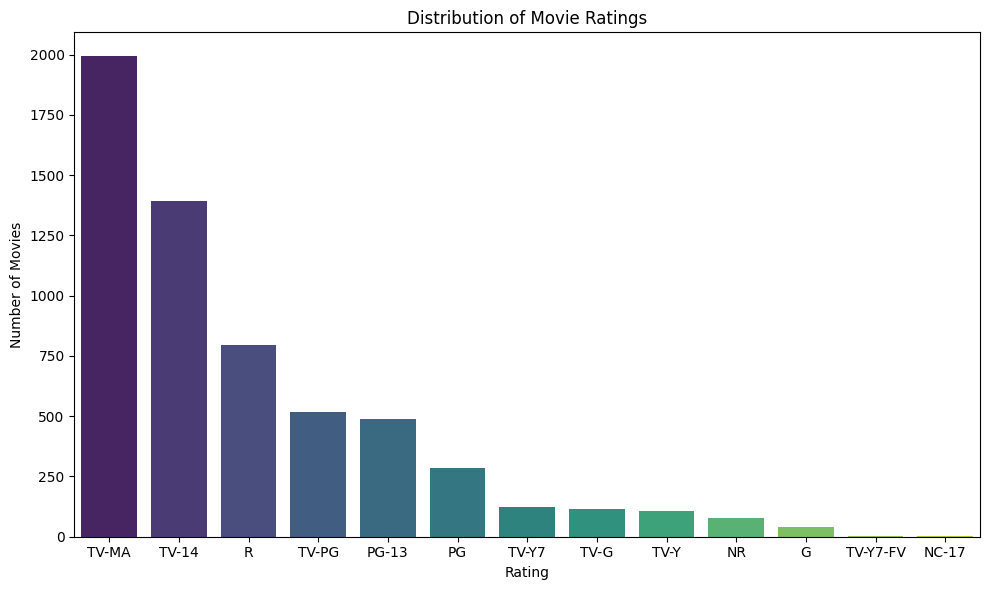

In [73]:
rating_counts = df['rating'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

**TV-MA** is the most common movie rating on Netflix, followed by **TV-14 and R**. Movies with a **NC-17** rating are very rare in this dataset, showing that Netflix mainly features content suitable for mature and teen audiences, while limiting access to more restricted content.

# Modeling

In [74]:
smd = df.copy()

In [ ]:
smd.head()

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [76]:
smd['text'] = (
    smd['title'].fillna('') + ', ' +
    (smd['director'].fillna('') + ', ') * 2 +
    (smd['cast'].fillna('') + ', ') * 3 +
    smd['country'].fillna('') + ', ' +
    smd['rating'].fillna('') + ', ' +
    (smd['listed_in'].fillna('') + ', ') * 5 +
    (smd['description'].fillna('') + ', ') * 2
    )
smd.dropna(subset=['text'], inplace=True)
smd['text'] = smd['text'].str.lower()

Several columns like **title**, **director**, **cast**, **country**, **rating**, **listed\_in**, and **description** are combined into a new column called **text**. Missing values are drop, and extra weight is given to **director**, **cast**, **listed\_in**, and **description** to highlight their importance. The final text is converted to lowercase for consistency during vectorization.

In [77]:
x = smd.copy()
x = x.drop_duplicates(subset=['text']).reset_index(drop=True)
x['text'].duplicated().sum()

0

Duplicates in the **text** column are removed to ensure each movie has a unique text representation, preventing the model from calculating similarity on redundant data.

In [78]:
filename = 'x.pkl'
pkl.dump(x, open(filename, 'wb'))

The final dataset is saved as **a pickle file** (x.pkl) for efficient loading in subsequent processes (during deployment with Streamlit).

## TF - IDF

In [79]:
tfidf = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1, 2),
    min_df=3,
    max_df=0.8,
    sublinear_tf=True)

tfidf_matrix = tfidf.fit_transform(x['text'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

The code transforms a collection of text documents into numerical feature vectors using **TF-IDF**, which highlights important terms by reducing the weight of common or overly rare words. It removes English stop words, considers both unigrams and bigrams, includes only terms that appear in at least three documents but no more than 80% of them, and applies sublinear scaling to term frequencies for better balance. The resulting matrix captures the relevance of each term across the corpus. Then, **cosine similarity** is computed using a linear kernel to measure the semantic similarity between all document pairs based on their TF-IDF vectors

In [80]:
filename = 'tfidf_matrixx.pkl'
pkl.dump(tfidf_matrix, open(filename, 'wb'))

The fitted TF-IDF vectorizer is saved as a pickle file (`tfidf.pkl`) for efficient reuse during subsequent processes, during deployment with Streamlit

## Build Recommender System

In [81]:
def get_recommendations(title, cosine_sim=cosine_sim, num_recommend = 5):
    indices = pd.Series(x.index, index=x['title']).drop_duplicates()
    idx = indices[title].iloc[0] if isinstance(indices[title], pd.Series) else indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_similar = sim_scores[1:num_recommend+1]
    movie_indices = [i[0] for i in top_similar]
    ret_df = pd.DataFrame(x.iloc[movie_indices])
    ret_df['Score'] = [i[1] for i in top_similar]
    ret_df = ret_df.drop(columns = ['text'])
    return ret_df

The `get_recommendations` function returns a list of top-5 recommended items based on a given title. It uses the cosine similarity matrix to find the most similar items, excluding the item itself, and returns a DataFrame containing the recommended titles along with their similarity scores. The resulting DataFrame excludes the original text column for cleaner output

# Evaluation

In [82]:
rec_games = get_recommendations('We Are One')
rec_games

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Score
5769,Tokyo Idols,Kyoko Miyake,Unknown,"United Kingdom, Canada, Japan",2017-10-01,2017,TV-14,89 min,"Documentaries, International Movies, Music & M...",This documentary follows J-Pop idol Rio and he...,0.440081
2595,Mexicanos de Bronce,Julio Fernández Talamantes,Unknown,Mexico,2018-12-31,2016,TV-MA,100 min,"Documentaries, International Movies, Music & M...","When street vices keep them coming back, three...",0.422528
2021,Wandering Stars,"Syrine Boulanouar, Nekfeu",Nekfeu,France,2019-12-01,2019,TV-MA,95 min,"Documentaries, International Movies, Music & M...",Navigating creative pressures and personal ups...,0.396516
2475,BNK48: Girls Don't Cry,Nawapol Thamrongrattanarit,Unknown,Thailand,2019-03-01,2018,TV-14,108 min,"Documentaries, International Movies, Music & M...",Members of the Thai idol girl group BNK48 open...,0.384722
1184,Bigflo & Oli: Hip Hop Frenzy,"Bigflo & Oli, Jérémie Levypon",Bigflo & Oli,France,2020-10-08,2020,TV-MA,100 min,"Documentaries, International Movies, Music & M...",Go backstage with French rap duo Bigflo & Oli ...,0.383038


This code retrieves the top recommended items similar to the title **"We Are One"** using the previously defined recommendation function. The result is stored in `rec_games`, which is a DataFrame containing the recommended titles along with their similarity scores

In [83]:
rec_games = get_recommendations('Wandering Stars')
rec_games

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Score
1184,Bigflo & Oli: Hip Hop Frenzy,"Bigflo & Oli, Jérémie Levypon",Bigflo & Oli,France,2020-10-08,2020,TV-MA,100 min,"Documentaries, International Movies, Music & M...",Go backstage with French rap duo Bigflo & Oli ...,0.410794
1408,We Are One,Stéphane de Freitas,Unknown,France,2020-07-14,2020,TV-MA,86 min,"Documentaries, International Movies, Music & M...",Activists around the world fight injustice and...,0.396516
3914,Avicii: True Stories,Levan Tsikurishvili,Avicii,"Sweden, Netherlands",2018-12-28,2017,TV-MA,97 min,"Documentaries, International Movies, Music & M...","Follow the meteoric rise of Tim Bergling, aka ...",0.376202
2595,Mexicanos de Bronce,Julio Fernández Talamantes,Unknown,Mexico,2018-12-31,2016,TV-MA,100 min,"Documentaries, International Movies, Music & M...","When street vices keep them coming back, three...",0.372044
1254,GIMS: On the Record,Florent Bodin,Maître Gims,France,2020-09-17,2020,TV-MA,96 min,"Documentaries, International Movies, Music & M...",Go backstage with beloved rap superstar Gims i...,0.356806


This code retrieves the top recommended items similar to the title **"Wandering Stars"** using the previously defined recommendation function. The result is stored in `rec_games`, which is a DataFrame containing the recommended titles along with their similarity scores

In [84]:
rec_games = get_recommendations('GIMS: On the Record')
rec_games

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Score
1184,Bigflo & Oli: Hip Hop Frenzy,"Bigflo & Oli, Jérémie Levypon",Bigflo & Oli,France,2020-10-08,2020,TV-MA,100 min,"Documentaries, International Movies, Music & M...",Go backstage with French rap duo Bigflo & Oli ...,0.547545
2595,Mexicanos de Bronce,Julio Fernández Talamantes,Unknown,Mexico,2018-12-31,2016,TV-MA,100 min,"Documentaries, International Movies, Music & M...","When street vices keep them coming back, three...",0.396464
1408,We Are One,Stéphane de Freitas,Unknown,France,2020-07-14,2020,TV-MA,86 min,"Documentaries, International Movies, Music & M...",Activists around the world fight injustice and...,0.369185
2021,Wandering Stars,"Syrine Boulanouar, Nekfeu",Nekfeu,France,2019-12-01,2019,TV-MA,95 min,"Documentaries, International Movies, Music & M...",Navigating creative pressures and personal ups...,0.356806
1500,One Take,Manatsanun Phanlerdwongsakul,BNK48,Thailand,2020-06-18,2020,TV-G,86 min,"Documentaries, International Movies, Music & M...",Members of Thai girl group BNK48 share the ups...,0.310345


This code retrieves the top recommended items similar to the title **"GIMS: On the Record"** using the previously defined recommendation function. The result is stored in `rec_games`, which is a DataFrame containing the recommended titles along with their similarity scores.


In [85]:
rec_games = get_recommendations('Naruto Shippuden: The Movie')
rec_games

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Score
36,Naruto the Movie 3: Guardians of the Crescent ...,Toshiyuki Tsuru,"Junko Takeuchi, Chie Nakamura, Yoichi Masukawa...",Japan,2021-09-15,2006,TV-PG,95 min,"Action & Adventure, Anime Features, Internatio...",Exuberant ninja Naruto teams up with his pals ...,0.553673
32,Naruto Shippûden the Movie: The Will of Fire,Masahiko Murata,"Junko Takeuchi, Chie Nakamura, Kazuhiko Inoue,...",Japan,2021-09-15,2009,TV-PG,96 min,"Action & Adventure, Anime Features, Internatio...",When four out of five ninja villages are destr...,0.551989
31,Naruto Shippûden the Movie: Bonds,Hajime Kamegaki,"Junko Takeuchi, Chie Nakamura, Noriaki Sugiyam...",Japan,2021-09-15,2008,TV-PG,93 min,"Action & Adventure, Anime Features, Internatio...",When strange ninjas ambush the village of Kono...,0.492951
30,Naruto Shippuden the Movie: Blood Prison,Masahiko Murata,"Junko Takeuchi, Chie Nakamura, Rikiya Koyama, ...",Japan,2021-09-15,2011,TV-14,102 min,"Action & Adventure, Anime Features, Internatio...",Mistakenly accused of an attack on the Fourth ...,0.491002
4958,Naruto Shippuden : Blood Prison,Masahiko Murata,"Junko Takeuchi, Chie Nakamura, Rikiya Koyama, ...",Japan,2017-09-01,2011,TV-14,102 min,"Action & Adventure, Anime Features, Internatio...",Mistakenly accused of an attack on the Fourth ...,0.484920


This code retrieves the top recommended items similar to the title **"Naruto Shippuden: The Movie"** using the previously defined recommendation function. The result is stored in `rec_games`, which is a DataFrame containing the recommended titles along with their similarity scores.

In [86]:
rec_games = get_recommendations('Mexicanos de Bronce')
rec_games

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Score
1408,We Are One,Stéphane de Freitas,Unknown,France,2020-07-14,2020,TV-MA,86 min,"Documentaries, International Movies, Music & M...",Activists around the world fight injustice and...,0.422528
1184,Bigflo & Oli: Hip Hop Frenzy,"Bigflo & Oli, Jérémie Levypon",Bigflo & Oli,France,2020-10-08,2020,TV-MA,100 min,"Documentaries, International Movies, Music & M...",Go backstage with French rap duo Bigflo & Oli ...,0.418154
2475,BNK48: Girls Don't Cry,Nawapol Thamrongrattanarit,Unknown,Thailand,2019-03-01,2018,TV-14,108 min,"Documentaries, International Movies, Music & M...",Members of the Thai idol girl group BNK48 open...,0.399039
1254,GIMS: On the Record,Florent Bodin,Maître Gims,France,2020-09-17,2020,TV-MA,96 min,"Documentaries, International Movies, Music & M...",Go backstage with beloved rap superstar Gims i...,0.396464
5751,This Was Tomorrow,Wim Bonte,Unknown,Belgium,2015-12-15,2015,NR,77 min,"Documentaries, International Movies, Music & M...",The Tomorrowland music festival marks its 10th...,0.388918


This code retrieves the top recommended items similar to the title **"Mexicanos de Bronce"** using the previously defined recommendation function. The result is stored in `rec_games`, which is a DataFrame containing the recommended titles along with their similarity scores.